In [196]:
import os
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, filters

%matplotlib notebook

In [4]:
rootpath = '/media/share/data/Tremella_fuciformis/'
pdpath = os.listdir(rootpath)
img_df = pd.DataFrame([], columns=['image_array', 'img_path', 'image_name'])

num = 0
for i, pdname in enumerate(pdpath):
    img_name = fnmatch.filter(os.listdir(os.path.join(rootpath, pdname)), '*.jpg')
    
    num = num + len(img_name)
#     for j, fname in enumerate(img_name):
        
            
print('All valid image file numeber :', num)

All valid image file numeber : 102


In [20]:
dirpath = rootpath + 'T8-170705/T8-170705 採樣調查表.csv'
df = pd.read_csv(dirpath, header=1)
df.columns

Index(['庫號', '號碼', 'Unnamed: 2', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', 'AVG', 'SD', '復水率', '朵型', '顏色', 'Unnamed: 20', '栽培庫號',
       '號碼.1', '朵型.1', '顏色.1', '取樣天數', '採收重量', 'Unnamed: 27', 'Unnamed: 28',
       '復水後重量', 'Unnamed: 30', 'Unnamed: 31', '復水率.1', '新品種', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39'],
      dtype='object')

In [22]:
df_temp = df[df['新品種'] == 'T8']
df_temp 

,庫號,號碼,Unnamed: 2,1,2,3,4,5,6,7,...,Unnamed: 30,Unnamed: 31,復水率.1,新品種,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
2,NaN,無號碼,復水前,119.5,110.0,110.0,105.5,102.5,101.0,97.5,...,±,20.0,165%,T8,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,復水後,184.5,168.5,165.0,158.0,155.5,154.5,154.0,...,NaN,NaN,NaN,T8,NaN,NaN,NaN,NaN,NaN,NaN


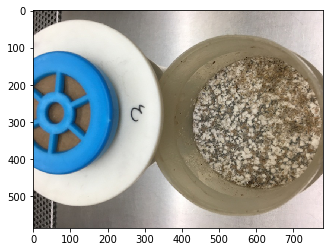

In [153]:
file = '/media/share/data/Tremella_fuciformis/T8-170705/image001.jpg'
img = plt.imread(file)
plt.imshow(img)

In [154]:
img.shape

(585, 779, 3)

In [160]:
from skimage.color import rgb2gray
from skimage.feature import canny
from skimage.morphology import white_tophat, disk
from skimage.segmentation import clear_border

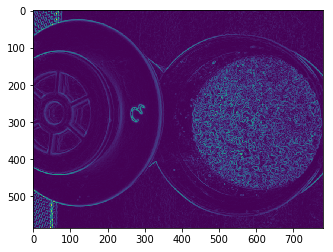

In [165]:
img_g = rgb2gray(img)
# plt.imshow(img_g)
edges = filters.sobel(img_g)
test = clear_border(edges)
plt.imshow(edges)

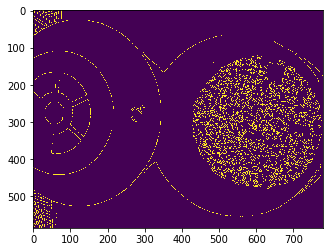

In [147]:
edges2 = canny(img_g, sigma=1.0,
              low_threshold=0.1, high_threshold=0.5)
plt.imshow(edges2)

In [128]:
from skimage.transform import hough_circle, hough_circle_peaks

hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges2, hough_radii)

In [129]:
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=2)

In [64]:
from scipy import ndimage as ndi

fill_circle1 = ndi.binary_fill_holes(edges)
fill_circle2 = ndi.binary_fill_holes(edges2)

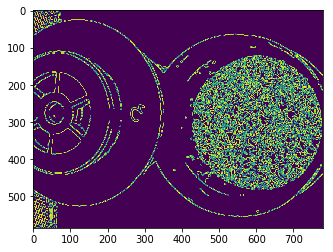

In [66]:
plt.imshow(filters.sobel(fill_circle2))

In [194]:
mask = filters.sobel(fill_circle2)
mask1 = np.zeros_like(mask)
mask1[mask < 0] = 0
mask1[mask > 0] = 1
test = clear_border(mask1, buffer_size=1, in_place=True)

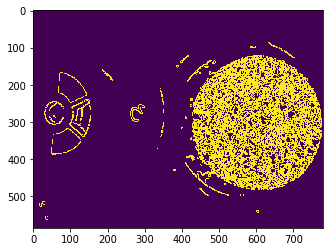

In [189]:
plt.imshow(test)